美国农业部食品数据库USDA

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_note_interactivity = "all"
%matplotlib inline


import os
import sys
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import json

pd.options.display.max_rows = 10

In [3]:
db = json.load(open('E:/py_pandasDA_practice/code/datasets/usda_food/database.json'))

In [4]:
len(db)

6636

In [5]:
db[0].keys()

dict_keys(['manufacturer', 'nutrients', 'id', 'description', 'group', 'tags', 'portions'])

In [6]:
db[0]['nutrients'][0]

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

In [7]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [8]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)

In [9]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [10]:
col_mapping ={'description': 'food',
              'group': 'fgroup'}

In [11]:
info = info.rename(columns=col_mapping, copy=False)

In [12]:
info[info.manufacturer.notnull()].manufacturer.value_counts().head()

                          4132
Campbell Soup Co.          203
Kellogg, Co.               189
The Quaker Oats, Co.        98
McDonald's Corporation      84
Name: manufacturer, dtype: int64

In [13]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
food            6636 non-null object
fgroup          6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [28]:
pd.value_counts(info.fgroup)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Name: fgroup, dtype: int64

In [15]:
# 将所有食物的nutrients转换为df

df_nu_list = [pd.DataFrame(db[i]['nutrients']) for i in range(len(db))]

In [16]:
df_id_list = [db[i]['id'] for i in range(len(db))]

In [17]:
for i, it in enumerate(df_nu_list):
    it['id'] = df_id_list[i]
    
df_nu_list[0].columns

Index(['description', 'group', 'units', 'value', 'id'], dtype='object')

In [18]:
# 将所有食物的表进行纵向连接

nutrients = pd.concat(df_nu_list, axis=0)

In [19]:
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
...,...,...,...,...,...
45,"Vitamin B-12, added",Vitamins,mcg,0.000,43546
46,Cholesterol,Other,mg,0.000,43546
47,"Fatty acids, total saturated",Other,g,0.072,43546
48,"Fatty acids, total monounsaturated",Other,g,0.028,43546


In [20]:
nutrients.duplicated().sum()

14179

In [21]:
nutrients = nutrients.drop_duplicates()

In [22]:
col_mapping = {'description': 'nutrient',
                'group': 'nugroup'}

In [23]:
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,nutrient,nugroup,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
...,...,...,...,...,...
45,"Vitamin B-12, added",Vitamins,mcg,0.000,43546
46,Cholesterol,Other,mg,0.000,43546
47,"Fatty acids, total saturated",Other,g,0.072,43546
48,"Fatty acids, total monounsaturated",Other,g,0.028,43546


In [24]:
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [25]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
nutrient        375176 non-null object
nugroup         375176 non-null object
units           375176 non-null object
value           375176 non-null float64
id              375176 non-null int64
food            375176 non-null object
fgroup          375176 non-null object
manufacturer    293054 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [26]:
ndata.iloc[30000]

nutrient                                       Glycine
nugroup                                    Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

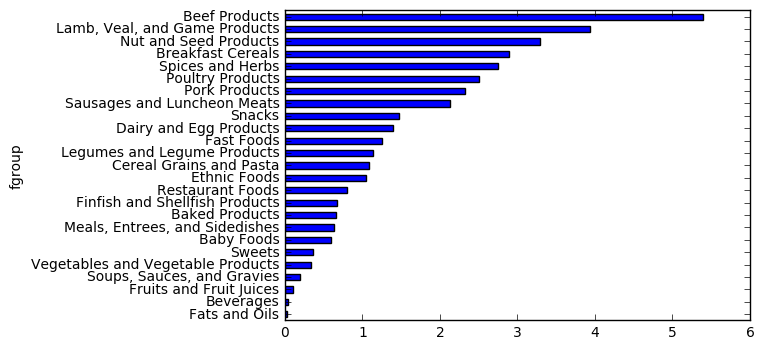

In [27]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [32]:

by_nutrient = ndata.groupby(['nugroup', 'nutrient'])

get_maximun = lambda x: x.loc[x.value.idxmax()]
get_minimun = lambda x: x.loc[x.value.idxmin()]

max_foods = by_nutrient.apply(get_maximun)[['value', 'food']]

max_foods.food = max_foods.food.str[:50]

In [35]:
max_foods.loc['Amino Acids']
#找出氨基酸含量最高的食物

,value,food
nutrient,,
Alanine,8.009,"Gelatins, dry powder, unsweetened"
Arginine,7.436,"Seeds, sesame flour, low-fat"
Aspartic acid,10.203,Soy protein isolate
Cystine,1.307,"Seeds, cottonseed flour, low fat (glandless)"
Glutamic acid,17.452,Soy protein isolate
...,...,...
Serine,4.600,"Soy protein isolate, PROTEIN TECHNOLOGIES INTE..."
Threonine,3.300,"Soy protein isolate, PROTEIN TECHNOLOGIES INTE..."
Tryptophan,1.600,"Sea lion, Steller, meat with fat (Alaska Native)"
